## Traitement Automatique du Langage Naturel (Project)
+ Emotion Detection In Text
+ Text Classifier

In [1]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

# Load Data Viz Pkgs
import seaborn as sns

# Load Text Cleaning Pkgs
import neattext.functions as nfx

# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
# Load Dataset
df = pd.read_csv("data/Reviews.csv", nrows=50000)

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
# Value Counts
df['Score'].value_counts()

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

<AxesSubplot:xlabel='Score', ylabel='count'>

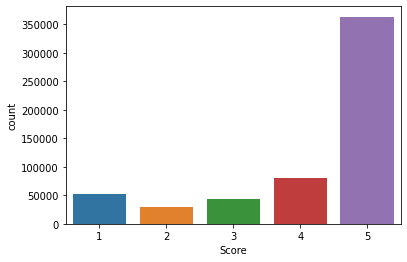

In [5]:
# Plot
sns.countplot(x='Score',data=df)

In [6]:
df = df[['Score','Text']]

In [7]:
df.head(3)

,Score,Text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...


In [8]:
# User handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [9]:
# Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [10]:
df

,Score,Text,Clean_Text
0,5,I have bought several of the Vitality canned d...,bought Vitality canned dog food products found...
1,1,Product arrived labeled as Jumbo Salted Peanut...,Product arrived labeled Jumbo Salted Peanuts.....
2,4,This is a confection that has been around a fe...,"confection centuries. light, pillowy citrus ge..."
3,2,If you are looking for the secret ingredient i...,looking secret ingredient Robitussin believe f...
4,5,Great taffy at a great price. There was a wid...,Great taffy great price. wide assortment yummy...
...,...,...,...
568449,5,Great for sesame chicken..this is a good if no...,Great sesame chicken..this good better restura...
568450,2,I'm disappointed with the flavor. The chocolat...,I'm disappointed flavor. chocolate notes espec...
568451,5,"These stars are small, so you can give 10-15 o...","stars small, 10-15 training session. tried tra..."
568452,5,These are the BEST treats for training and rew...,BEST treats training rewarding dog good groomi...


In [11]:
# Features & Labels
Xfeatures = df['Clean_Text']
ylabels = df['Score']

In [12]:
#  Split Data
x_train, x_test, y_train, y_test = train_test_split(Xfeatures, ylabels, test_size= 0.3,random_state= 42)

In [13]:
# Build Pipeline
from sklearn.pipeline import Pipeline

In [14]:
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [15]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

/home/dotpy/Bureau/Sentiments/taln/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [16]:
# Check Accuracy
pipe_lr.score(x_test,y_test)

0.7369016694324398

In [17]:
# Make A Prediction 1
dox1 = "Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most"

In [18]:
pipe_lr.predict([dox1])

array([5])

In [19]:
# Make A Prediction 1
dox2 = "Good Quality cat milk,I bought few of the Vitality canned cat milk products and have found them all to be of good quality."

In [20]:
pipe_lr.predict([dox2])

array([5])

In [21]:
# Prediction Prob
pipe_lr.predict_proba([dox1])

array([[0.00771019, 0.04281633, 0.0168857 , 0.20806189, 0.72452589]])

In [22]:
# To Know the classes
pipe_lr.classes_

array([1, 2, 3, 4, 5])

In [23]:
# Save Model & Pipeline
import joblib
pipeline_file = open("emotion_classifier_pipe_lr_29_mai_2021.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()